<a href="https://colab.research.google.com/github/RV05/EffecientDET-custom-dataset/blob/main/insulatorEfficientDet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 39.33 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 352.6MB 48kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp37-none-any.whl size=17452 sha256=ceba04e441685788db5f3373fe8e9d7b8b49390874819d291446cda5dc8f47a8
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [ ]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     | 194kB 11.9MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47868 sha256=75e37be14bea18fee32b2d0b21abadf1b9eb308c1df37cb4d6145f85ce888197
  Stored in directory: /tmp/pip-ephem-wheel-cache-quwinltp/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.28.1 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp37-none-any.whl size=16031 sha256=06c1cad36d216e2aef022182b5a81f019f43c3c514d7e3d2641cdc4478dcaa86
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch
     |██████████████████

# Let's get some data! 

The best part about Roboflow is the efficient management of your datasets. [Upload you dataset](roboflow.ai) and you will recieve a fresh curl code to ouput it in whatever augmented and annotated format you need. 

In [ ]:
#fresh curl courtesy of roboflow.ai, outputing our dataset in Coco Json format

!curl -L "https://app.roboflow.com/ds/jW9J71PMbE?key=yTYDbsPifd" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1451      0 --:--:-- --:--:-- --:--:--  1451
100 3499k  100 3499k    0     0  4045k      0 --:--:-- --:--:-- --:--:-- 4045k
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
 extracting: test/16_3735_jpg.rf.e3d8048a729d9f9935722e99a2e9056d.jpg  
 extracting: test/20_1470_jpg.rf.0d12097e11f6e184b6cd5161589ae7d4.jpg  
 extracting: test/20_360_jpg.rf.5bb8d504d214d9f6e6f5c23d92cd0eae.jpg  
 extracting: test/23_00526_jpg.rf.2473b2f9d16830a266d67184e7fbe1b9.jpg  
 extracting: test/25_00305_jpg.rf.6a575126d99723308ff8f8e5d40d878b.jpg  
 extracting: test/25_00475_jpg.rf.7472c5ecd7632624f0af5dedc659c5e6.jpg  
 extracting: test/25_00516_jpg.rf.aaaf64aeb5bec973b7fe934aa76acd88.jpg  
 extracting: test/28_1035_jpg.rf.53e9b776585e988f29a83d6f96b0d96f.jpg  
 extracting: test/29_00167_jpg.rf.9f3299701b

In [ ]:
#let's take a look at our directory
#notice the data came down in train, valid, test, splits - this is pre set during the dataset upload process
%ls

Monk_Object_Detection/  sample_data/  train/
README.roboflow.txt     test/         valid/


In [ ]:
#let's take a peak in train
#jpg images and some coco json annotations
%ls train

04_3420_jpg.rf.a1cd19a685656d858dbb0f0383f035f2.jpg
04_585_jpg.rf.69f46a897dcb1ef3ff15a7c9f7b8d68e.jpg
07_1035_jpg.rf.9645cbf2da2ab351ec8e2886e8abd158.jpg
08_1725_jpg.rf.f5313f2501ad2bd699b54cf33929aa8d.jpg
08_1830_jpg.rf.fbefed18822c831ce8229bd4cc765cf1.jpg
08_1890_jpg.rf.08503c52ba9d8678bba100332f0d3d9f.jpg
09_9180_jpg.rf.72709cfff48f423af2f28e8d930c24e2.jpg
11_5820_jpg.rf.1aefb9cf988534dc1ff2f5a8274d8da1.jpg
13_00146_jpg.rf.541632c21819c426c976fd08891db5b9.jpg
13_00270_jpg.rf.3b2b4aa276604e5bc2881ca5ac981dd0.jpg
14_00121_jpg.rf.86d6dbe7591621a90fda72e02b0fc6d6.jpg
14_02226_jpg.rf.3e1a9b6fdcbd42dd79ddaa33b5795ae8.jpg
16_3435_jpg.rf.01592d83bc8b7c484de0fce42b0ee593.jpg
16_3450_jpg.rf.6e420a984f97a05f78bf18e75911858e.jpg
16_3465_jpg.rf.52140e84e3c28b952c27b2b78360fdca.jpg
16_3660_jpg.rf.f763624af8be6a11705993b112463973.jpg
16_3675_jpg.rf.9d4decf64d0a4e1b3ff9269dfe1b1887.jpg
16_3705_jpg.rf.1eb874b162c64b8a37efec0db0b946a1.jpg
16_3720_jpg.rf.b0cdbfeb81fb598ee4f16b4ff7d9fa75.jpg
18_00455_

In [ ]:
#in the next three cells, we move the data into a structure that the image detection library will be expecting
#but no file data manipulation is necessary
#images can also be segmented into class folders, but we combine all classes here
!mkdir rohit
!mkdir rohit/annotations
!mkdir rohit/Annotations
!mkdir rohit/Images

In [ ]:
%cp train/_annotations.coco.json rohit/annotations/instances_Images.json

In [ ]:
%cp train/*.jpg rohit/Images/

# Training

In this section we set up the efficientDet-d0 model from backbone and train to our custom case

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
gtf = Detector();

In [ ]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "rohit";
img_dir = "./";
set_dir = "Images";

In [ ]:
#smells like some free compute from Colab, nice
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=416, use_gpu=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [ ]:
%%time
gtf.Train(num_epochs=200, model_output_dir="trained/");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you u

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:2578: UserWarning: Exporting aten::index operator with indices of type Byte. Only 1-D indices are supported. In any other case, this will produce an incorrect ONNX graph.
  warnings.warn("Exporting aten::index operator with indices of type Byte. "
/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:662: UserWarning: This model contains a squeeze operation on dimension 1. If the model is intended to be used with dynamic input shapes, please use opset version 11 to export the model.
  "intended to be used with dynamic input shapes, please use opset version 11 to export the model.")


Epoch    63: reducing learning rate of group 0 to 1.0000e-05.


Epoch    69: reducing learning rate of group 0 to 1.0000e-06.


Epoch    73: reducing learning rate of group 0 to 1.0000e-07.


Epoch    77: reducing learning rate of group 0 to 1.0000e-08.


CPU times: user 1h 3min 9s, sys: 23min 59s, total: 1h 27min 9s
Wall time: 1h 29min 45s


# Inference

In [ ]:
from google.colab import files
files.download('/content/trained/signatrix_efficientdet_coco.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained/")

In [ ]:
#extract class list from our annotations
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

['Insulator', 'Insulator', 'tower']

In [ ]:
%%time
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.090s)
CPU times: user 85.4 ms, sys: 34 ms, total: 119 ms
Wall time: 134 ms


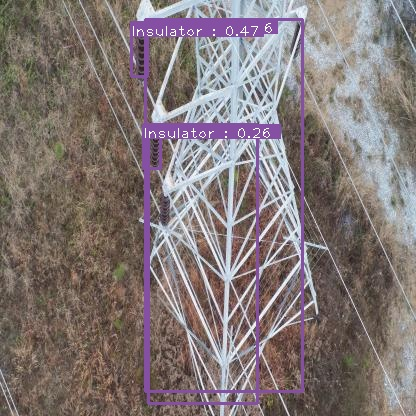

In [ ]:
from IPython.display import Image
Image(filename='output.jpg') 

# Export Trained Weights

In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%mkdir trained_export
%cp ./trained/signatrix_efficientdet_coco.onnx ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).onnx
%cp ./trained/signatrix_efficientdet_coco.pth ./trained_export/signatrix_efficientdet_coco_$(date +%F-%H:%M).pth
%mv ./trained_export/* /content/drive/My\ Drive/

# Reloading Trained Weights after Export

Imagine you have exported your trained model and would like to reaccess it later. This portion of the notebook picks up the trained model and starts at inference


In [ ]:
#export trained model
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 37.02 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.


In [ ]:
# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     |████████████████████████████████| 352.6MB 48kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp37-none-any.whl size=17452 sha256=44d084fe910f4482443f87d6c1376132c4b5204acdb592d1ddb08ac139858120
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml
     \ 184kB 19.5MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47868 sha256=e21784d82e13a0c8e25896c9ea65c60c49c1f71e2ec35febf2a82da84e3ed16e
  Stored in directory: /tmp/pip-ephem-wheel-cache-e2q076pj/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.28.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement tqdm>=4.36.1, but you'll have tqdm 4.28.1 which is inc

In [ ]:
#recover trained weights
!mkdir '/trained'
!cp '/content/signatrix_efficientdet_coco.onnx' '/trained/signatrix_efficientdet_coco.onnx'
!cp '/content/signatrix_efficientdet_coco.pth' '/trained/signatrix_efficientdet_coco.pth'

mkdir: cannot create directory ‘/trained’: File exists


In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer
gtf = Infer();

In [ ]:
cd /content/

/content


In [ ]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="/trained")

In [ ]:
#download some test data
!curl -L [YOUR LINK HERE] | jar -x

curl: (3) [globbing] bad range in column 2
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: LINK
curl: (3) [globbing] unmatched close brace/bracket in column 5


In [ ]:
!ls valid

11_00090_jpg.rf.22e83e21041e419c01ef8520f051230f.jpg
16_3645_jpg.rf.598b597e32e9be3037c980f0ecc311c0.jpg
22_00331_jpg.rf.ef9085aed5c067da9a73386cf1893b6e.jpg
26_00083_jpg.rf.71466f4d9ec27eea574632d0a8f846ff.jpg
27_00375_jpg.rf.87c8c15ab00545c2e906e34c5d9ee860.jpg
29_00268_jpg.rf.f930be6cb1dedddb7ce60dce6a79385d.jpg
31_7740_jpg.rf.d6c288dafa46d3dcc7338f8048873da7.jpg
36_2190_jpg.rf.40712f959246d54ae6b7b10f97d1e5ac.jpg
36_780_jpg.rf.0c7aa42d04fa36170c8056fa7b071e63.jpg
_annotations.coco.json


In [ ]:
#extract class list from our annotations
#in your application you will probably already have this saved
import json
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

['Insulator', 'Insulator', 'tower']

In [ ]:
%%time
#bang!
img_path = "/content/test/25_00516_jpg.rf.aaaf64aeb5bec973b7fe934aa76acd88.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.089s)
CPU times: user 89.4 ms, sys: 28.8 ms, total: 118 ms
Wall time: 115 ms


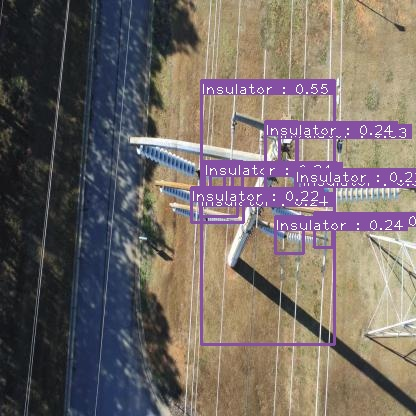

In [ ]:
from IPython.display import Image
Image(filename='output.jpg') 